##Q1. Install and load the latest versions of TensorFlow and Keras. Print their versions.


In [ ]:
!pip install tensorflow
!pip install keras

import tensorflow as tf
from tensorflow import keras

print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)


TensorFlow version: 2.12.0
Keras version: 2.12.0


##Q2. Load the Wine Quality dataset and explore its dimensions.

In [ ]:
import pandas as pd

# Load the dataset
wine_data = pd.read_csv('winequality.csv')  # Replace 'winequality.csv' with the path to your dataset file

# Explore the dimensions of the dataset
print("Number of rows:", wine_data.shape[0])
print("Number of columns:", wine_data.shape[1])


Number of rows: 1599
Number of columns: 12


##Q3. Check for null values, identify categorical variables, and encode them.

In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
dataset_path = "/content/winequality.csv"
df = pd.read_csv(dataset_path)

# Check for null values
print("Null values:")
print(df.isnull().sum())

# Identify categorical variables
categorical_vars = ['quality']

# Encode categorical variables
label_encoder = LabelEncoder()
for var in categorical_vars:
    df[var] = label_encoder.fit_transform(df[var])

# Print the encoded dataset
print("\nEncoded dataset:")
print(df.head())

Null values:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Encoded dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0     

##Q4. Separate the features and target variables from the dataframe.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Separate the features and target variables
X = df.drop('quality', axis=1)
y = df['quality']

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Perform train-test split on the encoded data
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
X_train, X_val, y_train_encoded, y_val_encoded = train_test_split(X_train, y_train_encoded, test_size=0.2, random_state=42)


##Q5. Perform a train-test split, dividing the data into training, validation, and test datasets.

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
dataset_path = "/content/winequality.csv"
df = pd.read_csv(dataset_path)

# Separate the features and target variables
features = df.drop('quality', axis=1)
target = df['quality']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Further split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Print the shapes of the datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Training set shape: (1023, 11) (1023,)
Validation set shape: (256, 11) (256,)
Test set shape: (320, 11) (320,)


##Q6. Scale the dataset using an appropriate scaling technique.

In [11]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# Fit the scaler to the training data
scaler.fit(X_train)

# Scale the training, validation, and test data
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


##Q7. Design and implement at least two hidden layers and an output layer for the binary categorical variables.

In [13]:
import pandas as pd

# Load the dataset
dataset_path = "/content/winequality.csv"
df = pd.read_csv(dataset_path)

# Determine the number of features
n_features = df.shape[1] - 1  # Subtract 1 to exclude the target variable

print("Number of features:", n_features)


Number of features: 11


In [15]:
import tensorflow as tf
from tensorflow import keras

# Define the input layer
inputs = keras.Input(shape=(n_features,))

# Add the first hidden layer
hidden1 = keras.layers.Dense(64, activation='relu')(inputs)

# Add the second hidden layer
hidden2 = keras.layers.Dense(32, activation='relu')(hidden1)

# Add the output layer
outputs = keras.layers.Dense(1, activation='sigmoid')(hidden2)

# Create the model
model = keras.Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


##Q8. Create a Sequential model in Keras and add the previously designed layers to it.

In [19]:
import tensorflow as tf
from tensorflow import keras

# Define the model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(n_features,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])



##Q9. Print the summary of the model architecture.

In [20]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                768       
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


##Q10. Set the loss function(‘binary_crossentropy’), optimizer, and include the accuracy metric in the model.
##Q11. Compile the model with the specified loss function, optimizer, and metrics.

In [21]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


##Q12. Fit the model to the training data using appropriate batch size and number of epochs.

In [23]:
model.fit(X_train, y_train_encoded, validation_data=(X_val, y_val_encoded), epochs=100, batch_size=32)

Epoch 1/100
32/32 [==============================] - 2s 10ms/step - loss: 1.4094 - accuracy: 0.5327 - val_loss: 0.6700 - val_accuracy: 0.5586
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6641 - accuracy: 0.6334 - val_loss: 0.6489 - val_accuracy: 0.6055
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6472 - accuracy: 0.6325 - val_loss: 0.6493 - val_accuracy: 0.6172
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6483 - accuracy: 0.6149 - val_loss: 0.6404 - val_accuracy: 0.6016
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6665 - accuracy: 0.6139 - val_loss: 0.6739 - val_accuracy: 0.5742
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6356 - accuracy: 0.6256 - val_loss: 0.6897 - val_accuracy: 0.5430
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6556 - accuracy: 0.6168 - val_loss: 0.6774 - val_accuracy: 0.5742
Epoch 8/100


##Q13. Obtain the model's parameters (weights and biases).

In [24]:
model_weights = model.get_weights()

for layer_idx, layer_weights in enumerate(model_weights):
    print(f"Layer {layer_idx} weights shape: {layer_weights.shape}")


Layer 0 weights shape: (11, 64)
Layer 1 weights shape: (64,)
Layer 2 weights shape: (64, 32)
Layer 3 weights shape: (32,)
Layer 4 weights shape: (32, 1)
Layer 5 weights shape: (1,)


##Q14. Store the model's training history as a Pandas DataFrame.

In [26]:
import pandas as pd

# Fit the model and store the training history
history = model.fit(X_train, y_train_encoded, validation_data=(X_val, y_val_encoded), epochs=100, batch_size=32)

# Convert the history to a DataFrame
history_df = pd.DataFrame(history.history)

# Print the history DataFrame
print(history_df)


Epoch 1/100
32/32 [==============================] - 0s 13ms/step - loss: 0.4888 - accuracy: 0.7537 - val_loss: 0.5466 - val_accuracy: 0.7617
Epoch 2/100
32/32 [==============================] - 0s 10ms/step - loss: 0.5112 - accuracy: 0.7302 - val_loss: 0.5562 - val_accuracy: 0.7344
Epoch 3/100
32/32 [==============================] - 0s 10ms/step - loss: 0.4865 - accuracy: 0.7586 - val_loss: 0.6218 - val_accuracy: 0.6797
Epoch 4/100
32/32 [==============================] - 1s 16ms/step - loss: 0.4955 - accuracy: 0.7439 - val_loss: 0.5375 - val_accuracy: 0.7617
Epoch 5/100
32/32 [==============================] - 0s 11ms/step - loss: 0.4985 - accuracy: 0.7498 - val_loss: 0.5455 - val_accuracy: 0.7422
Epoch 6/100
32/32 [==============================] - 0s 15ms/step - loss: 0.4832 - accuracy: 0.7527 - val_loss: 0.5319 - val_accuracy: 0.7500
Epoch 7/100
32/32 [==============================] - 0s 12ms/step - loss: 0.4924 - accuracy: 0.7546 - val_loss: 0.5337 - val_accuracy: 0.7500
Epoch 

##Q15. Plot the training history (e.g., accuracy and loss) using suitable visualization techniques.

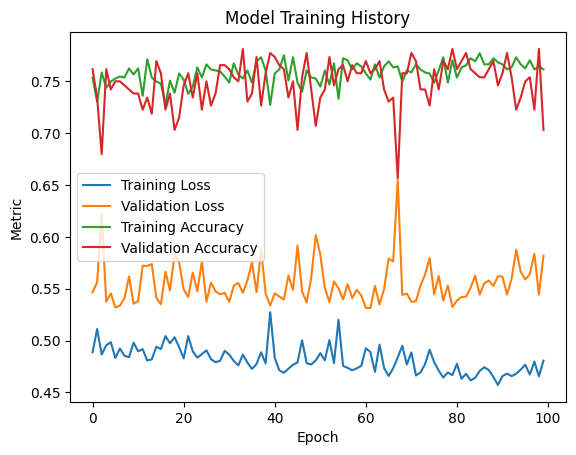

In [28]:
import matplotlib.pyplot as plt

# Plot the training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Training History')
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.legend()
plt.show()


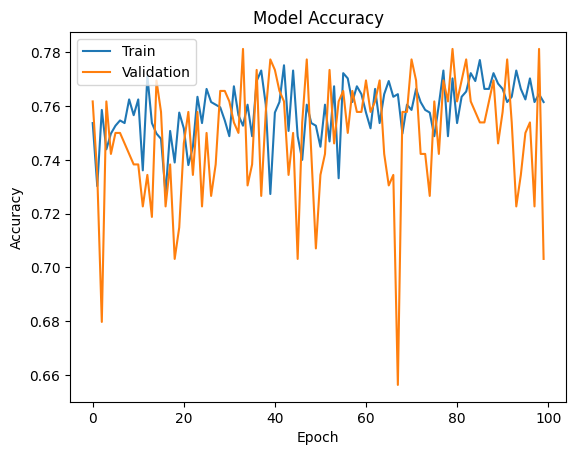

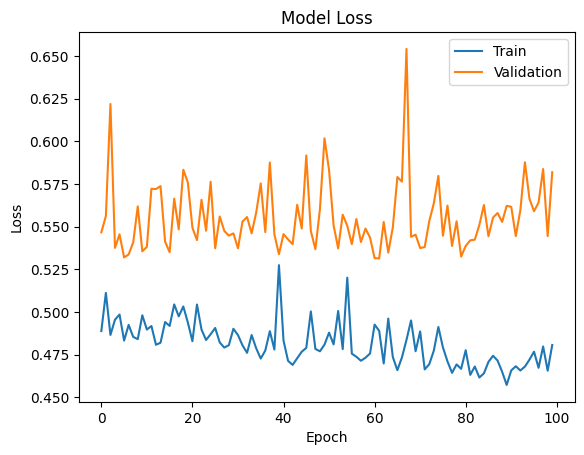

In [27]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


##Q16. Evaluate the model's performance using the test dataset and report relevant metrics.

In [30]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)


10/10 [==============================] - 0s 4ms/step - loss: 0.5486 - accuracy: 0.7125
Test Loss: 0.5485841631889343
Test Accuracy: 0.7124999761581421
